In [ ]:
%pip install skimage

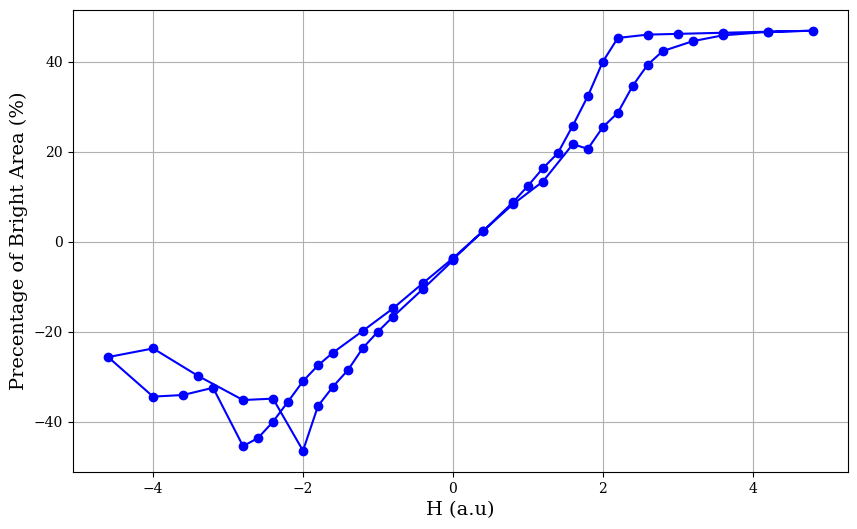

In [1]:
import os
from skimage import io, color, filters
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import rc

# Set the font family to 'serif'
rc('font', family='serif')

# Directory containing the images (using raw string for Windows path)
image_directory = r'C:\Users\Einav\Desktop\Uni\שנה ג\Semester_a\Lab_b1\Magnetism\code\domains'  # Your specified path

# List to store the data
area_data = []

# Loop through all images with the specified naming pattern (handling both single and double digit numbers)
for num in range(1, 57):
    # Create the file name pattern, without zero-padding the number, and check for both .png and .bmp extensions
    png_filename = os.path.join(image_directory, f'grant_*_v_mes_{num}.png')
    bmp_filename = os.path.join(image_directory, f'grant_*_v_mes_{num}.bmp')

    # Find the files that match the pattern
    image_files = glob.glob(png_filename) + glob.glob(bmp_filename)

    # If there's at least one matching file
    if image_files:
        image_file = image_files[0]  # In case there are multiple, take the first one

        # Extract only the filename from the full path
        base_filename = os.path.basename(image_file)  # Extracts 'grant_*_v_mes_{num}.png' or .bmp

        # Extract the value of * from the filename
        try:
            filename_parts = base_filename.split('_')  # Split the filename by '_'
            star_value = filename_parts[1]  # Extract the part corresponding to '*'

            # Load and process the image
            image = io.imread(image_file)
            grayscale_image = color.rgb2gray(image)  # Convert to grayscale

            # Apply a threshold (Otsu's method)
            threshold = filters.threshold_otsu(grayscale_image)
            binary_image = grayscale_image > threshold  # Bright areas are True, dark areas are False

            # Calculate areas
            dark_area = np.sum(~binary_image)  # Count dark pixels (False)
            bright_area = np.sum(binary_image)  # Count bright pixels (True)

            # Calculate the percentage of bright area out of total area
            total_area = dark_area + bright_area
            bright_percentage = (bright_area / total_area) * 100

            # Normalize the percentage (shift it so that 50% becomes 0)
            normalized_bright_percentage = bright_percentage - 50

            # Store the result in the list
            area_data.append({
                'star_value': float(star_value),  # Convert to float to handle numeric values properly
                'normalized_bright_percentage': normalized_bright_percentage
            })
        except Exception as e:
            print(f"Failed to process {image_file}: {e}")
    else:
        print(f"No file found for: {png_filename} or {bmp_filename}")

# Extract the data for plotting
star_values = [data['star_value'] for data in area_data]
normalized_bright_percentages = [data['normalized_bright_percentage'] for data in area_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(star_values, normalized_bright_percentages, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('H (a.u)', fontsize=14, fontfamily='serif')
plt.ylabel('Precentage of Bright Area (%)', fontsize=14, fontfamily='serif')

# Show the plot
plt.grid(True)
plt.show()


Looping through the pictures

In [23]:
import os
from skimage import io, color, filters
import numpy as np
import glob

# Directory containing the images (using raw string for Windows path)
image_directory = r'C:\Users\Einav\Desktop\Uni\שנה ג\Semester_a\Lab_b1\Magnetism\code\domains'  # Your specified path

# List to store the data
area_data = []

# Loop through all images with the specified naming pattern (handling both single and double digit numbers)
for num in range(1, 57):
    # Create the file name pattern, without zero-padding the number, and check for both .png and .bmp extensions
    png_filename = os.path.join(image_directory, f'grant_*_v_mes_{num}.png')
    bmp_filename = os.path.join(image_directory, f'grant_*_v_mes_{num}.bmp')

    # Find the files that match the pattern
    image_files = glob.glob(png_filename) + glob.glob(bmp_filename)

    # If there's at least one matching file
    if image_files:
        image_file = image_files[0]  # In case there are multiple, take the first one

        # Load and process the image
        try:
            image = io.imread(image_file)
            grayscale_image = color.rgb2gray(image)  # Convert to grayscale

            # Apply a threshold (Otsu's method)
            threshold = filters.threshold_otsu(grayscale_image)
            binary_image = grayscale_image > threshold  # Bright areas are True, dark areas are False

            # Calculate areas
            dark_area = np.sum(~binary_image)  # Count dark pixels (False)
            bright_area = np.sum(binary_image)  # Count bright pixels (True)

            # Store the result in the list
            area_data.append({
                'num': num,  # Image identifier (e.g., the number in the filename)
                'dark_area': dark_area,
                'bright_area': bright_area
            })
        except Exception as e:
            print(f"Failed to process {image_file}: {e}")
    else:
        print(f"No file found for: {png_filename} or {bmp_filename}")

# Print the collected data
for data in area_data:
    print(f"Image num: {data['num']} - Dark Area: {data['dark_area']} pixels, Bright Area: {data['bright_area']} pixels")


Image num: 1 - Dark Area: 424450 pixels, Bright Area: 361982 pixels
Image num: 2 - Dark Area: 375169 pixels, Bright Area: 411263 pixels
Image num: 3 - Dark Area: 328133 pixels, Bright Area: 458299 pixels
Image num: 4 - Dark Area: 288364 pixels, Bright Area: 498068 pixels
Image num: 5 - Dark Area: 223065 pixels, Bright Area: 563367 pixels
Image num: 6 - Dark Area: 231200 pixels, Bright Area: 555232 pixels
Image num: 7 - Dark Area: 193333 pixels, Bright Area: 593099 pixels
Image num: 8 - Dark Area: 168181 pixels, Bright Area: 618251 pixels
Image num: 9 - Dark Area: 120725 pixels, Bright Area: 665707 pixels
Image num: 10 - Dark Area: 83926 pixels, Bright Area: 702506 pixels
Image num: 11 - Dark Area: 60316 pixels, Bright Area: 726116 pixels
Image num: 12 - Dark Area: 43033 pixels, Bright Area: 743399 pixels
Image num: 13 - Dark Area: 32847 pixels, Bright Area: 753585 pixels
Image num: 14 - Dark Area: 26810 pixels, Bright Area: 759622 pixels
Image num: 15 - Dark Area: 24748 pixels, Bright 

Single image + picture in grayscale

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Einav\AppData\Local\Temp\ipykernel_12188\167848843.py:5: SyntaxWarning: invalid escape sequence '\g'
  image = io.imread('domains\grant_2.6_v_mes_10.png')


Dark Area: 83926 pixels (10.67%)
Bright Area: 702506 pixels (89.33%)


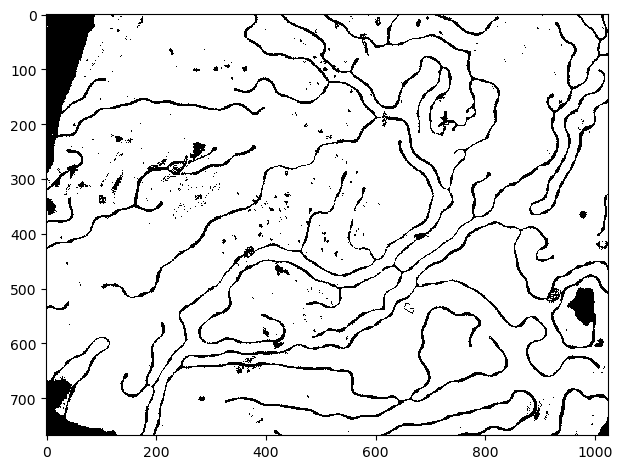

In [24]:
from skimage import io, color, filters
import numpy as np

# Load the image
image = io.imread('domains\grant_2.6_v_mes_10.png')
grayscale_image = color.rgb2gray(image)  # Convert to grayscale

# Apply a threshold (Otsu's method automatically finds a suitable threshold)
threshold = filters.threshold_otsu(grayscale_image)
binary_image = grayscale_image > threshold  # Bright areas are True, dark areas are False

# Calculate areas
dark_area = np.sum(~binary_image)  # Count False (dark) pixels
bright_area = np.sum(binary_image)  # Count True (bright) pixels

# Print results
total_pixels = grayscale_image.size
print(f"Dark Area: {dark_area} pixels ({(dark_area / total_pixels) * 100:.2f}%)")
print(f"Bright Area: {bright_area} pixels ({(bright_area / total_pixels) * 100:.2f}%)")

# Optional: Display the binary image
io.imshow(binary_image, cmap='gray')
io.show()
